In [252]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [253]:
data = pd.read_csv('Visadataset.csv')
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


## EDA

In [254]:
data.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [255]:
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [256]:
data.duplicated().any()

False

In [257]:
num_features = [feature for feature in data.columns if data[feature].dtype != 'O']
num_features

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

In [258]:
cat_features= [feature for feature in data.columns if data[feature].dtype == 'O']
print(len(cat_features))
cat_features

9


['case_id',
 'continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

In [259]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [260]:
def num_of_unique_values(data,col):
    return (f"{col} Have these no of unique valuse : {data[col].nunique()}")

In [261]:
for i in data.columns:
    print(num_of_unique_values(data,i))

case_id Have these no of unique valuse : 25480
continent Have these no of unique valuse : 6
education_of_employee Have these no of unique valuse : 4
has_job_experience Have these no of unique valuse : 2
requires_job_training Have these no of unique valuse : 2
no_of_employees Have these no of unique valuse : 7105
yr_of_estab Have these no of unique valuse : 199
region_of_employment Have these no of unique valuse : 5
prevailing_wage Have these no of unique valuse : 25454
unit_of_wage Have these no of unique valuse : 4
full_time_position Have these no of unique valuse : 2
case_status Have these no of unique valuse : 2


In [262]:
data.shape

(25480, 12)

In [263]:
data.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [264]:
data['case_status'].value_counts(normalize=True)*100

case_status
Certified    66.789639
Denied       33.210361
Name: proportion, dtype: float64

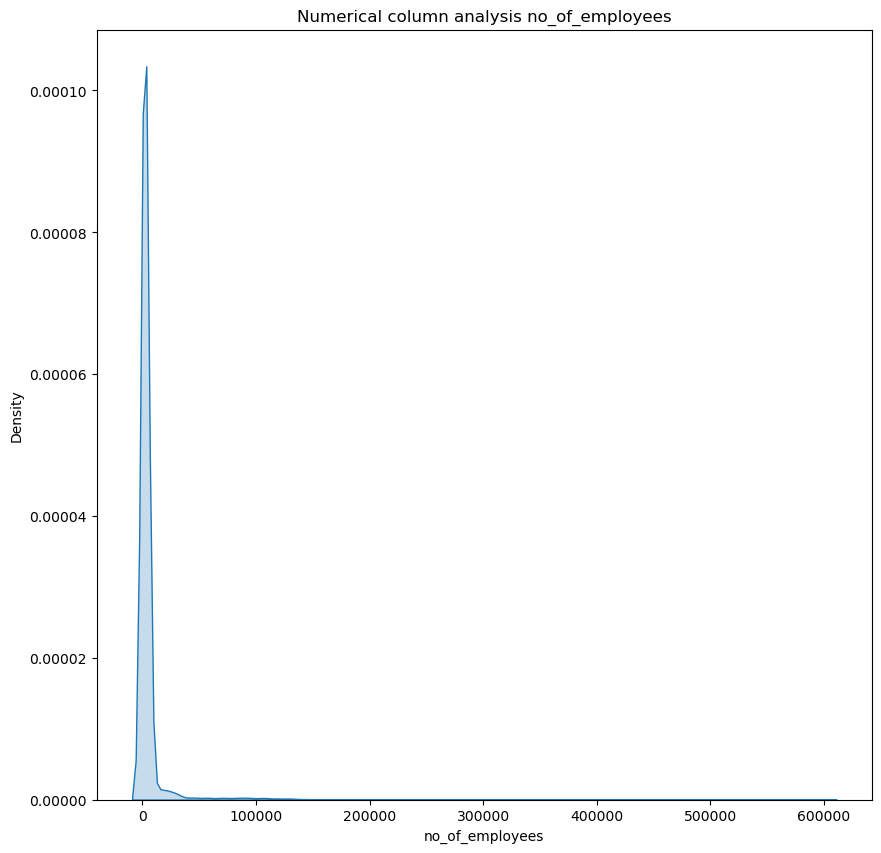

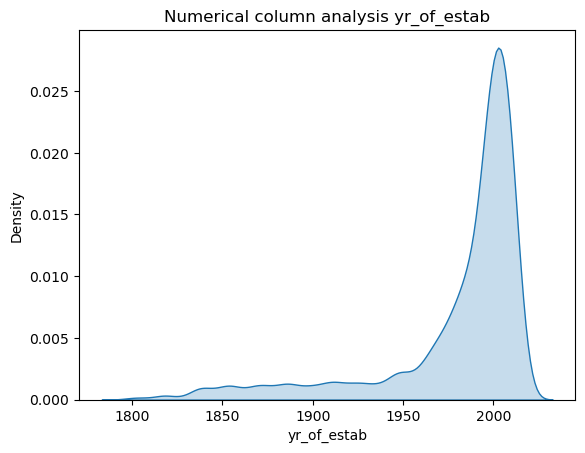

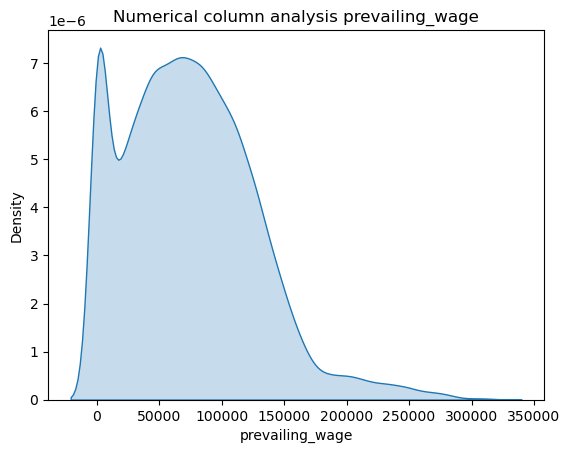

In [265]:
plt.figure(figsize=(10,10))
for feature in num_features:
    sns.kdeplot(data[feature],fill=True)
    plt.title(f'Numerical column analysis {feature}')
    plt.show()

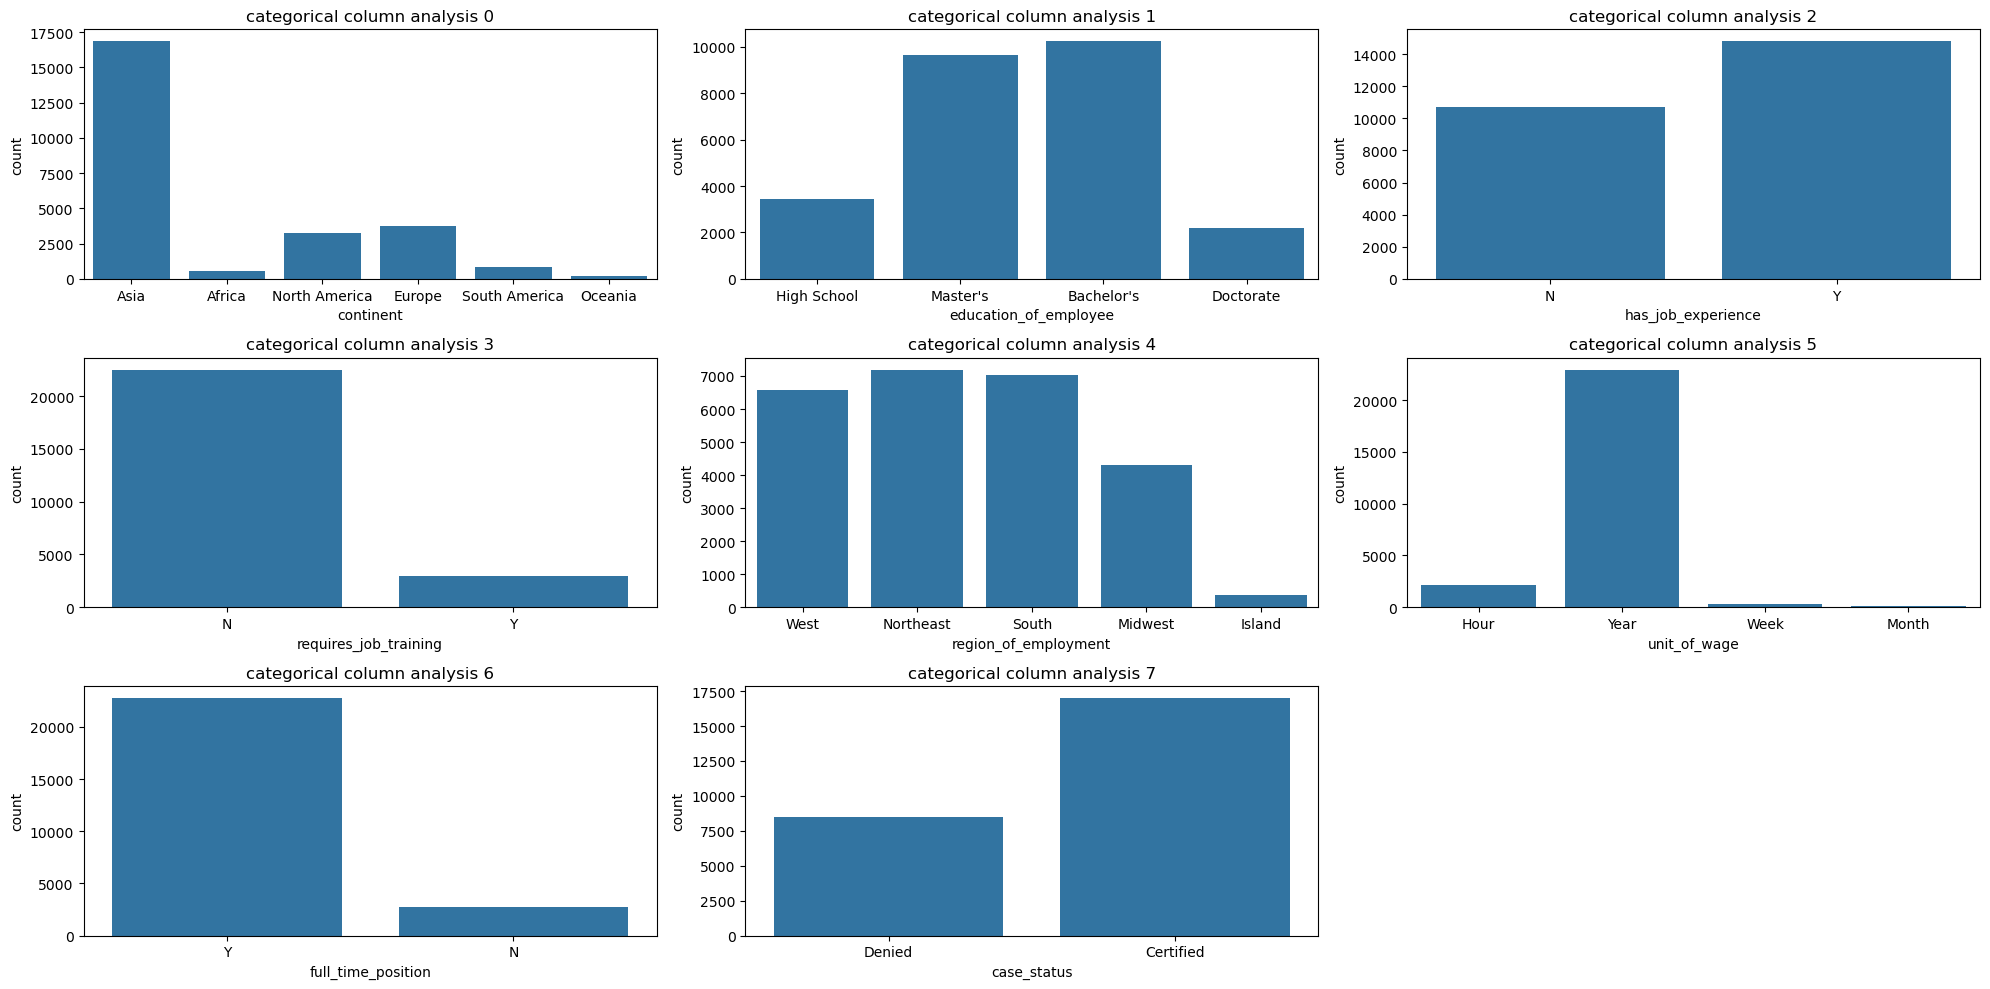

In [266]:
cat_features.remove('case_id')
plt.figure(figsize=(20,10))
for  i in range(0,len(cat_features)):
    plt.subplot(3,3,i+1)
    sns.countplot(x=data[cat_features[i]],fill=True)
    plt.title(f'categorical column analysis {i}')
    plt.tight_layout()
plt.show()

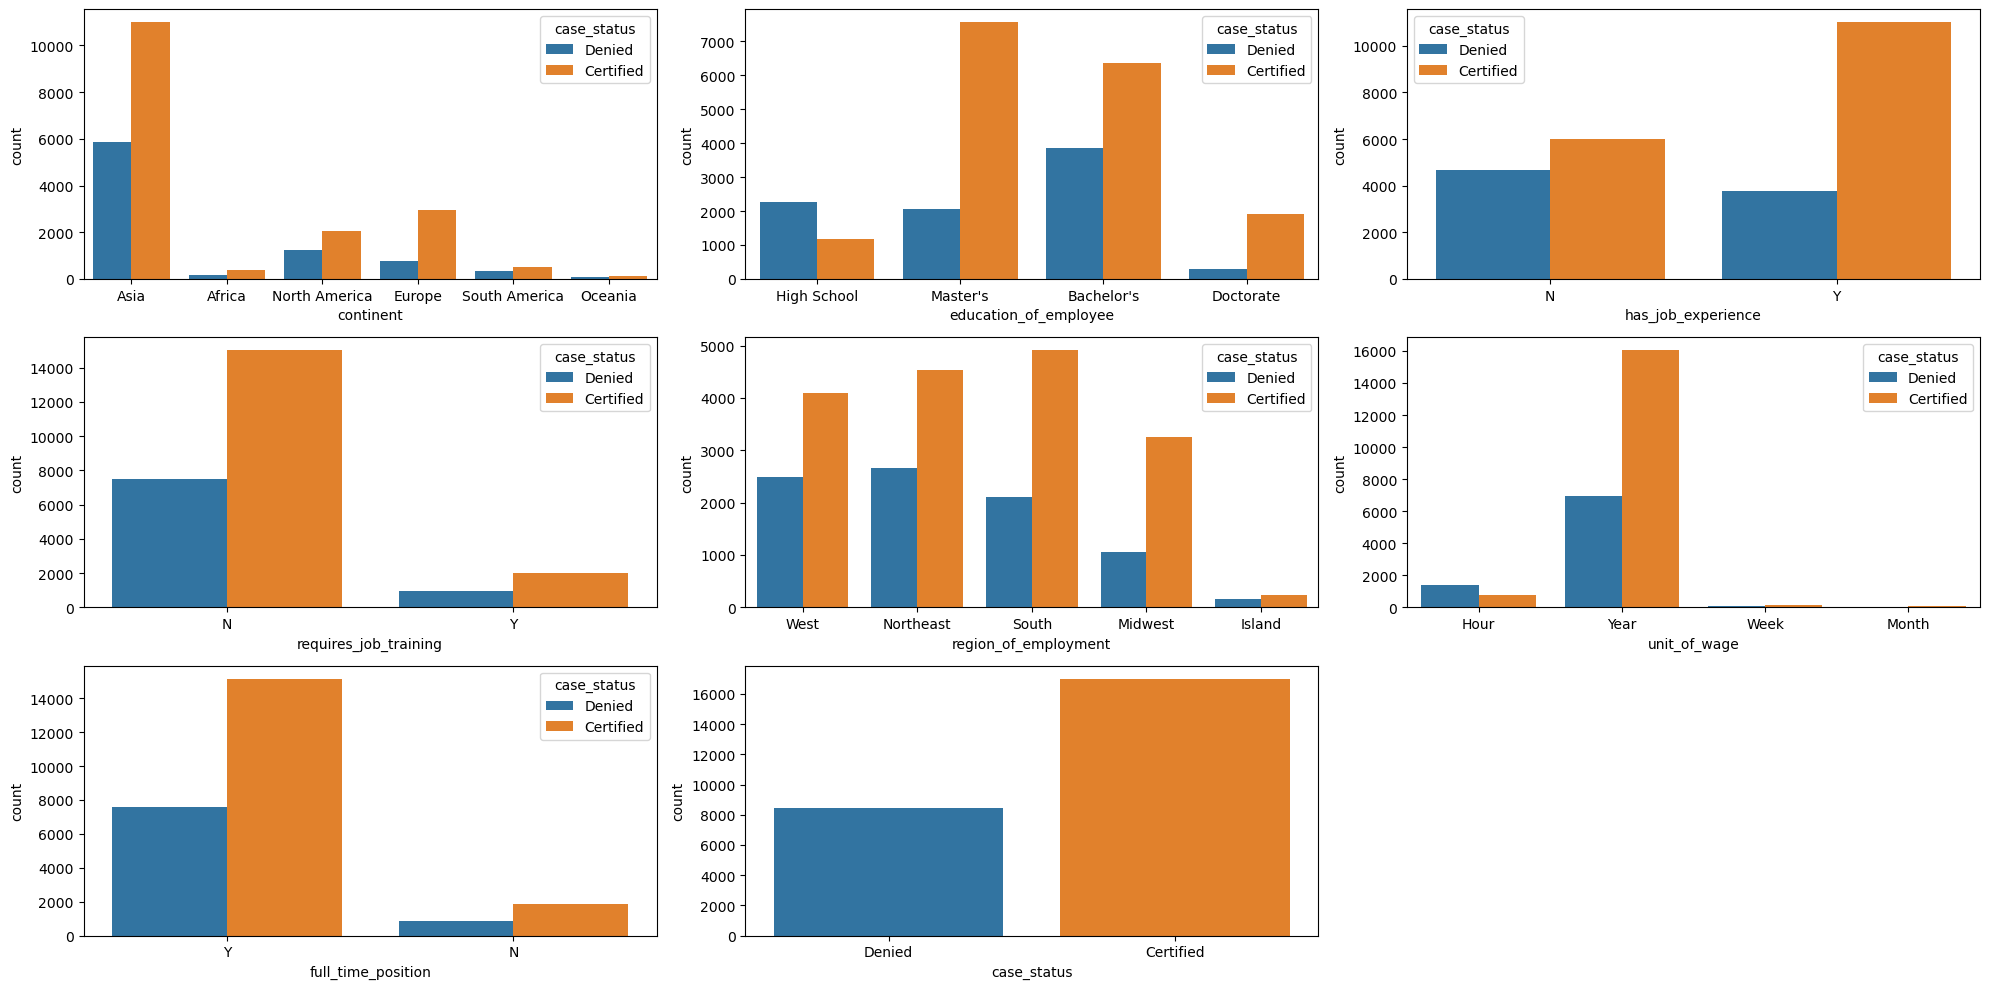

In [267]:
#cat_features.remove('case_id')
plt.figure(figsize=(20,10))
for  i in range(0,len(cat_features)):
    plt.subplot(3,3,i+1)
    sns.countplot(x=data[cat_features[i]],fill=True,hue=data['case_status'])
    plt.tight_layout()
plt.show()

<Axes: xlabel='case_status'>

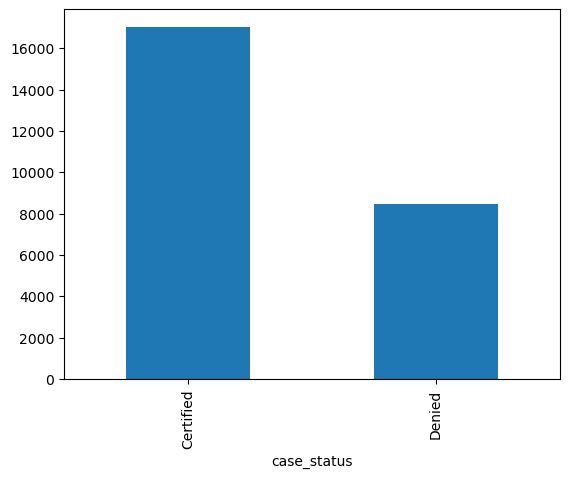

In [268]:
data['case_status'].value_counts().plot(kind='bar')

In [269]:
from scipy.stats import chi2_contingency
chi_test = []  
for col in cat_features:
    table = pd.crosstab(data[col], data['case_status'])  
    _, p, _, _ = chi2_contingency(table)  

    if p < 0.05:
        chi_test.append('Reject Null Hypothesis')  
    else:
        chi_test.append('Fail to Reject Null Hypothesis')  
result = pd.DataFrame({'Column': cat_features, 'Hypothesis Result': chi_test})
result

,Column,Hypothesis Result
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Fail to Reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


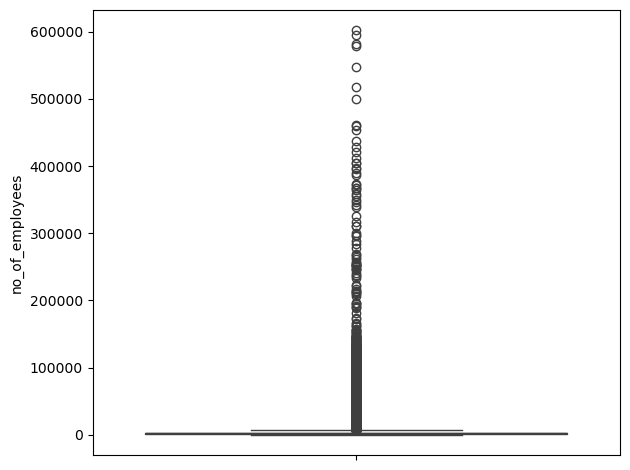

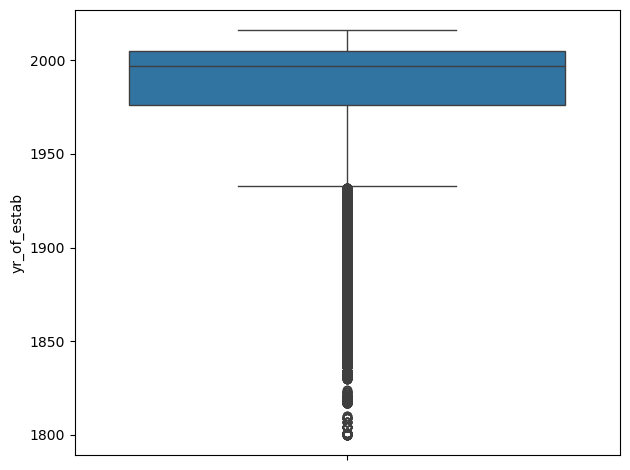

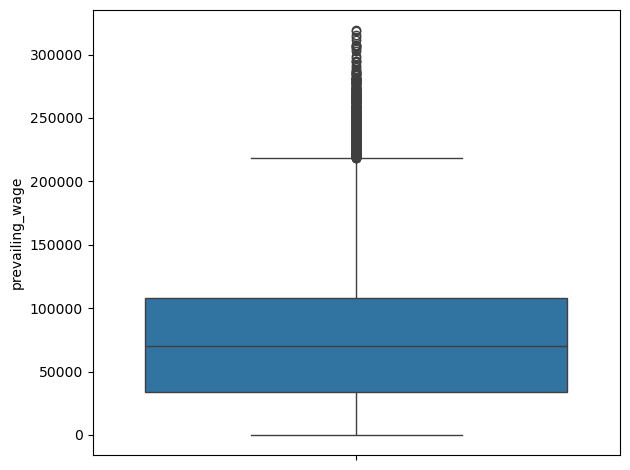

In [270]:
for  i in range(0,len(num_features)):
    sns.boxplot(y=data[num_features[i]],fill=True)
    plt.tight_layout()
    plt.show()

## FE

In [271]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [272]:
data.drop(columns=['case_id','requires_job_training'],axis=1,inplace=True)

In [273]:
def outlier_re(data, col):
    Q1 = data[col].quantile(0.25)  
    Q3 = data[col].quantile(0.75)  
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR  
    upper_bound = Q3 + 1.5 * IQR  
    
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    
    return data  

In [274]:
for i in num_features:
    skew_val = data[i].skew()
    print(f"{i} skew value : {skew_val}")

no_of_employees skew value : 12.265260077708275
yr_of_estab skew value : -2.037301271676438
prevailing_wage skew value : 0.7557760603032042


In [275]:
data = outlier_re(data,'no_of_employees')
data = outlier_re(data,'yr_of_estab')

In [276]:
for i in num_features:
    skew_val = data[i].skew()
    print(f"{i} skew value : {skew_val}")

no_of_employees skew value : 0.5856657661512061
yr_of_estab skew value : -1.4046299269620335
prevailing_wage skew value : 0.753753350421684


In [277]:
data.head()

,continent,education_of_employee,has_job_experience,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
1,Asia,Master's,Y,2412,2002,Northeast,83425.65,Year,Y,Certified
4,Africa,Master's,Y,1082,2005,South,149907.39,Year,Y,Certified
5,Asia,Master's,Y,2339,2012,South,78252.14,Year,Y,Certified
6,Asia,Bachelor's,N,4985,1994,South,53635.39,Year,Y,Certified
8,Asia,Bachelor's,N,4810,2012,Midwest,74362.19,Year,Y,Certified


In [278]:
data.columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'no_of_employees', 'yr_of_estab', 'region_of_employment',
       'prevailing_wage', 'unit_of_wage', 'full_time_position', 'case_status'],
      dtype='object')

In [279]:
num_features = ['prevailing_wage']

In [280]:

or_columns = ['has_job_experience','full_time_position','education_of_employee']
oh_columns = ['continent','region_of_employment']

from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, oh_columns),
        ("Ordinal_Encoder", ordinal_encoder, or_columns),
        #("Transformer", transform_pipe, transform_columns),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [281]:
data.head()

,continent,education_of_employee,has_job_experience,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
1,Asia,Master's,Y,2412,2002,Northeast,83425.65,Year,Y,Certified
4,Africa,Master's,Y,1082,2005,South,149907.39,Year,Y,Certified
5,Asia,Master's,Y,2339,2012,South,78252.14,Year,Y,Certified
6,Asia,Bachelor's,N,4985,1994,South,53635.39,Year,Y,Certified
8,Asia,Bachelor's,N,4810,2012,Midwest,74362.19,Year,Y,Certified


In [282]:
data.drop(['no_of_employees','yr_of_estab'],axis=1,inplace=True)

In [283]:
X = data.drop('case_status', axis=1)
y = data['case_status']

In [284]:
y= np.where(y=='Denied', 1,0)

In [285]:
X = preprocessor.fit_transform(X)

In [286]:
from imblearn.combine import SMOTETomek, SMOTEENN
smt = SMOTEENN(random_state=42,sampling_strategy='minority' )
X,y = smt.fit_resample(X, y)

In [287]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [340]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay
from xgboost import XGBClassifier

In [348]:
rf = RandomForestClassifier(n_estimators=200, max_features= 'log2', max_depth= None)
rf.fit(X_train,y_train)
prd = rf.predict(X_test)
accuracy_score(y_test,prd)

0.9814254859611231

In [349]:
xgb = XGBClassifier(min_child_weight= 1, max_depth =  9)
xgb.fit(X_train,y_train)
prd = xgb.predict(X_test)
accuracy_score(y_test,prd)

0.9663066954643629

In [352]:
knn = KNeighborsClassifier(weights= 'distance', n_neighbors= 4, algorithm= 'auto')
knn.fit(X_train,y_train)
prd = knn.predict(X_test)
accuracy_score(y_test,prd)

0.980561555075594

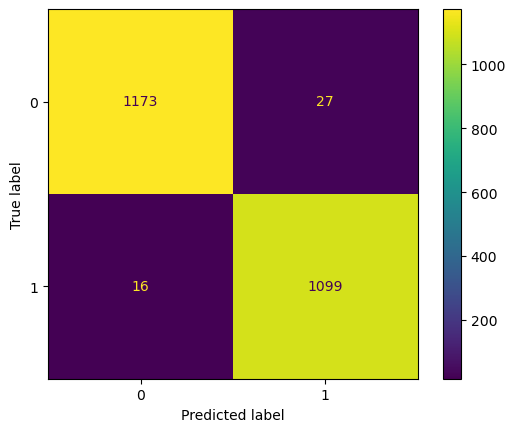

In [354]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

In [337]:
data.head()

,continent,education_of_employee,has_job_experience,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
1,Asia,Master's,Y,Northeast,83425.65,Year,Y,Certified
4,Africa,Master's,Y,South,149907.39,Year,Y,Certified
5,Asia,Master's,Y,South,78252.14,Year,Y,Certified
6,Asia,Bachelor's,N,South,53635.39,Year,Y,Certified
8,Asia,Bachelor's,N,Midwest,74362.19,Year,Y,Certified


In [338]:
data.unit_of_wage.unique()

array(['Year', 'Hour', 'Week', 'Month'], dtype=object)

## test the model 

In [355]:
column_names = ['continent', 'education_of_employee', 'has_job_experience', 'region_of_employment', 'prevailing_wage', 'unit_of_wage', 'full_time_position']
raw_data =[['Asia',"Master's",'N','Northeast','83425.65','Year','N']]
raw_data_df = pd.DataFrame(raw_data, columns=column_names)
raw_data_transformed = preprocessor.transform(raw_data_df)
out_put = rf.predict(raw_data_transformed)
if out_put == 1:
    print('Denied')
else:
    print('Certified')

Certified
